## importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\kanth\\Downloads\\archive\\dataAnalystJobsIndia_7th_July_2024.csv")               

In [3]:
df.shape

(1561, 16)

In [4]:
df.head(3)

,Unnamed: 0,job_title,company,experience,min exp,max exp,salary,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by
0,0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,NaN,NaN,NaN,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",NaN
1,1,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,800000.0,1600000.0,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company
2,2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,NaN,NaN,NaN,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",NaN


In [5]:
#no use with salary data provide by so removing that column
df=df.drop("salary data provide by",axis=1)

In [6]:
df.head(3)

,Unnamed: 0,job_title,company,experience,min exp,max exp,salary,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details
0,0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,NaN,NaN,NaN,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations"
1,1,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,800000.0,1600000.0,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis"
2,2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,NaN,NaN,NaN,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management"


In [7]:
# finding null values
df.isnull().sum()

Unnamed: 0                0
job_title                 0
company                   0
experience               34
min exp                  34
max exp                  34
salary                 1218
base salary            1218
max salary             1218
location                 33
jobListed(days ago)       0
postedIn                  0
rating                  437
reviews count           437
details                  33
dtype: int64

In [8]:
df["salary"].mode()[0]

'₹ 10 - 20L/yr'

In [9]:
#fill the null values with mode
df["salary"]=df["salary"].fillna(df["salary"].mode()[0])
df["base salary"]=df["base salary"].fillna(df["base salary"].mode()[0])
df["max salary"]=df["max salary"].fillna(df["max salary"].mode()[0])
df["experience"]=df["experience"].fillna(df["experience"].mode()[0])
df["min exp"]=df["min exp"].fillna(df["min exp"].mode()[0])
df["max exp"]=df["max exp"].fillna(df["max exp"].mode()[0])

In [10]:
df.isnull().sum()

Unnamed: 0               0
job_title                0
company                  0
experience               0
min exp                  0
max exp                  0
salary                   0
base salary              0
max salary               0
location                33
jobListed(days ago)      0
postedIn                 0
rating                 437
reviews count          437
details                 33
dtype: int64

In [11]:
#null values in the columns rating,reviews count are filled with zeroes
df["rating"]=df["rating"].fillna(0)
df["reviews count"]=df["reviews count"].fillna(0)

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

Unnamed: 0             0
job_title              0
company                0
experience             0
min exp                0
max exp                0
salary                 0
base salary            0
max salary             0
location               0
jobListed(days ago)    0
postedIn               0
rating                 0
reviews count          0
details                0
dtype: int64

In [14]:
df.shape

(1528, 15)

In [15]:
df.dtypes

Unnamed: 0               int64
job_title               object
company                 object
experience              object
min exp                float64
max exp                float64
salary                  object
base salary            float64
max salary             float64
location                object
jobListed(days ago)    float64
postedIn                object
rating                 float64
reviews count          float64
details                 object
dtype: object

<AxesSubplot:title={'center':'Box Plot for Outliers Detection'}>

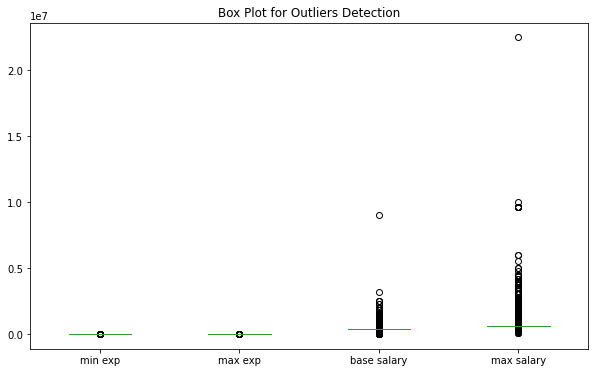

In [16]:
#finding outliers in dataset
# Generate box plots for numeric columns like salary or experience
df[['min exp', 'max exp', 'base salary', 'max salary']].plot(kind='box', figsize=(10,6),
                                                             title='Box Plot for Outliers Detection')


C:\Users\kanth\AppData\Local\Temp\ipykernel_11384\3484949689.py:9: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


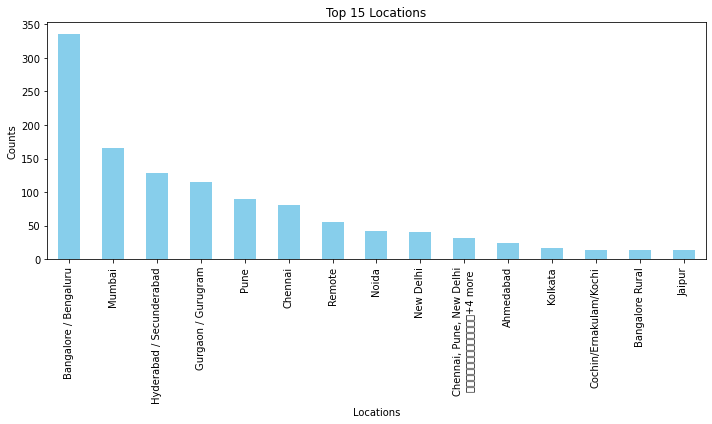

In [17]:
# Job Postings by Location
location=df['location'].value_counts()
top_15_locations=location.nlargest(15)
plt.figure(figsize=(10, 6))
top_15_locations.plot(kind='bar', color='skyblue')
plt.title('Top 15 Locations')
plt.xlabel('Locations')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Distribution of Experience Required'}, ylabel='Frequency'>

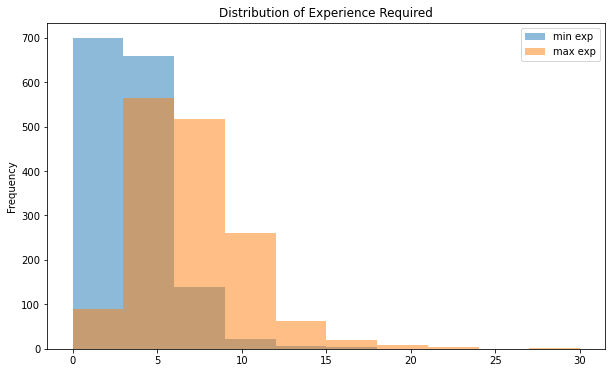

In [18]:
# Experience Range Distribution 
df[['min exp', 'max exp']].plot(kind='hist', bins=10, alpha=0.5, title='Distribution of Experience Required', figsize=(10,6))


<AxesSubplot:title={'center':'Salary Range Distribution'}>

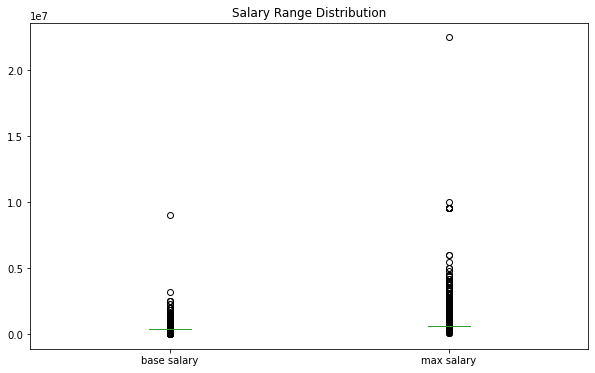

In [19]:
# Salary Range Distribution 
df[['base salary', 'max salary']].plot(kind='box', title='Salary Range Distribution', figsize=(10,6))


<AxesSubplot:title={'center':'top 15 companies with their job postings'}, ylabel='company'>

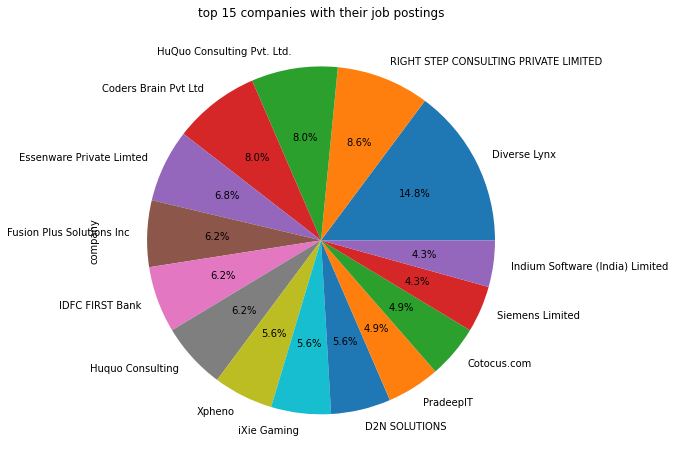

In [20]:
# Job Postings by Company 
postings=df['company'].value_counts()
postings.nlargest(15).plot(kind='pie', autopct='%1.1f%%', title='top 15 companies with their job postings', figsize=(8,8))


<AxesSubplot:title={'center':'Salary vs Experience'}, xlabel='min exp', ylabel='base salary'>

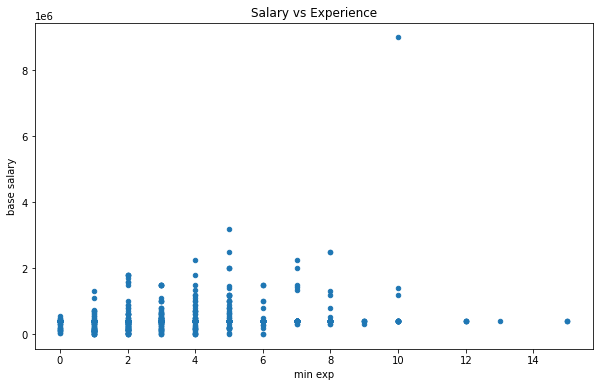

In [21]:
#Salary vs Experience
df.plot.scatter(x='min exp', y='base salary', title='Salary vs Experience', figsize=(10,6))

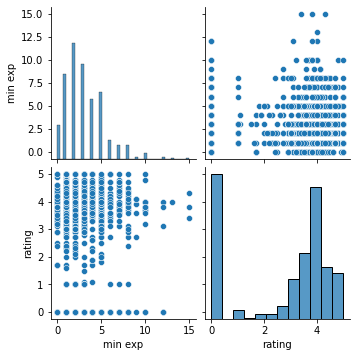

In [22]:
#Pair Plot: Relationship Between Salary, Experience, and Rating
sns.pairplot(df[['salary', 'min exp', 'rating']].dropna())
plt.show()

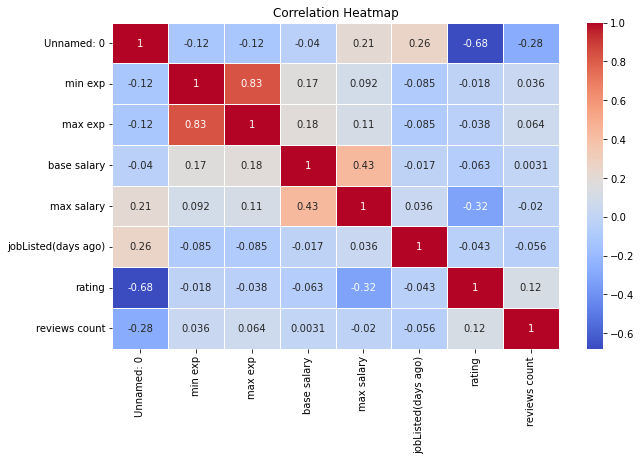

In [23]:
# Correlation Heatmap: Correlations Among Numerical Variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

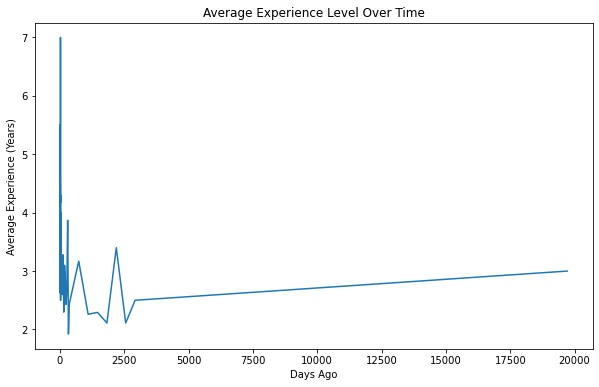

In [24]:
#Line Plot: Job Listings Over Time by Experience Level
df.groupby('jobListed(days ago)')['min exp'].mean().plot(kind='line', figsize=(10,6), title='Average Experience Level Over Time')
plt.xlabel('Days Ago')
plt.ylabel('Average Experience (Years)')
plt.show()

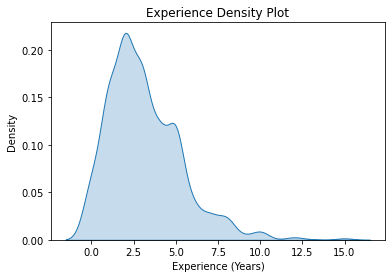

In [25]:
#Density Plot: Distribution of Experience
sns.kdeplot(df['min exp'], shade=True)
plt.title('Experience Density Plot')
plt.xlabel('Experience (Years)')
plt.show()

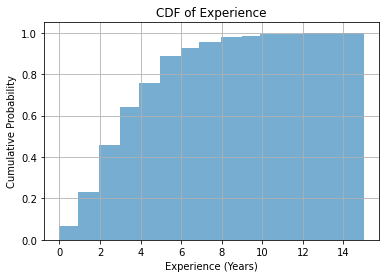

In [26]:
#Cumulative Distribution Function (CDF) Plot: Experience
df['min exp'].hist(cumulative=True, density=True, bins=100, alpha=0.6)
plt.title('CDF of Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Cumulative Probability')
plt.show()

In [27]:
import warnings
warnings.filterwarnings('ignore')

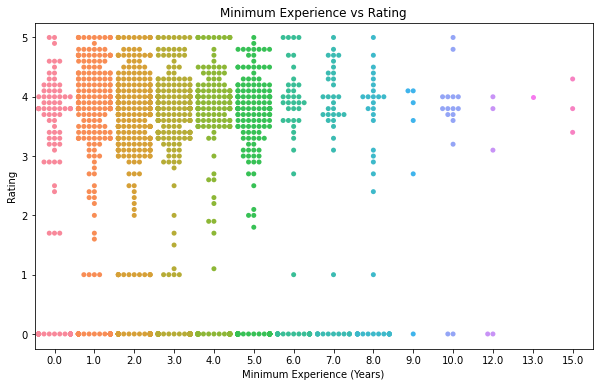

In [28]:
# Swarm Plot: Experience vs Rating
plt.figure(figsize=(10, 6))
sns.swarmplot(x='min exp', y='rating', data=df)
plt.title('Minimum Experience vs Rating')
plt.xlabel('Minimum Experience (Years)')
plt.ylabel('Rating')
plt.show()

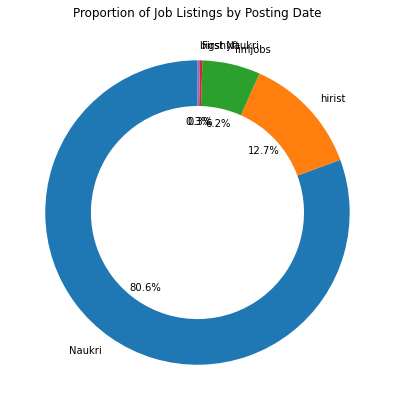

In [29]:
#Donut Chart: Proportion of Job Listings by PostedIn
plt.figure(figsize=(7, 7))
df['postedIn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
plt.title('Proportion of Job Listings by Posting Date')
plt.ylabel('')
plt.show()

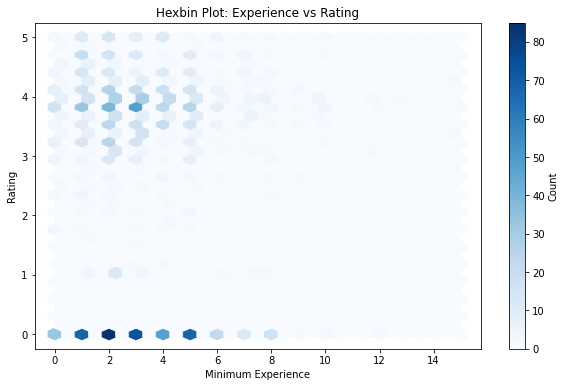

In [30]:
# Hexbin Plot: Experience vs Rating
plt.figure(figsize=(10, 6))
plt.hexbin(df['min exp'], df['rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Experience vs Rating')
plt.xlabel('Minimum Experience')
plt.ylabel('Rating')
plt.show()

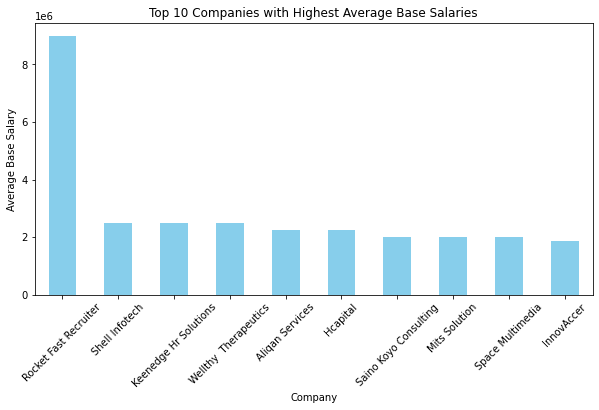

In [31]:
salary_insights = df.groupby('company')['base salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
salary_insights.plot(kind='bar', color='skyblue')
plt.title("Top 10 Companies with Highest Average Base Salaries")
plt.ylabel("Average Base Salary")
plt.xlabel("Company")
plt.xticks(rotation=45)
plt.show()

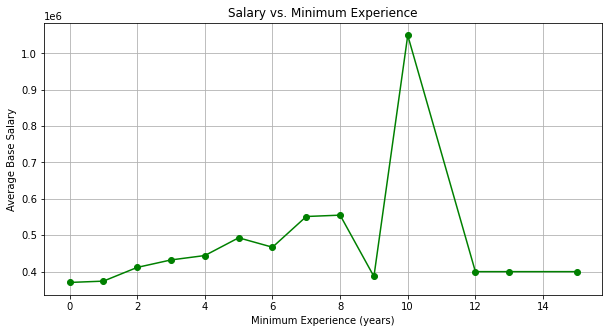

In [32]:
experience_salary = df.groupby('min exp')['base salary'].mean()

plt.figure(figsize=(10, 5))
experience_salary.plot(kind='line', marker='o', color='green')
plt.title("Salary vs. Minimum Experience")
plt.xlabel("Minimum Experience (years)")
plt.ylabel("Average Base Salary")
plt.grid(True)
plt.show()


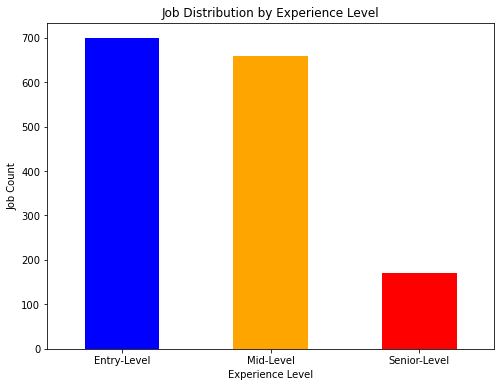

In [33]:
# Categorize experience levels
def experience_category(row):
    if row['min exp'] <= 2:
        return 'Entry-Level'
    elif 2 < row['min exp'] <= 5:
        return 'Mid-Level'
    else:
        return 'Senior-Level'

df['Experience Level'] = df.apply(experience_category, axis=1)

# Count jobs by category
exp_dist = df['Experience Level'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
exp_dist.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title("Job Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Job Count")
plt.xticks(rotation=0)
plt.show()


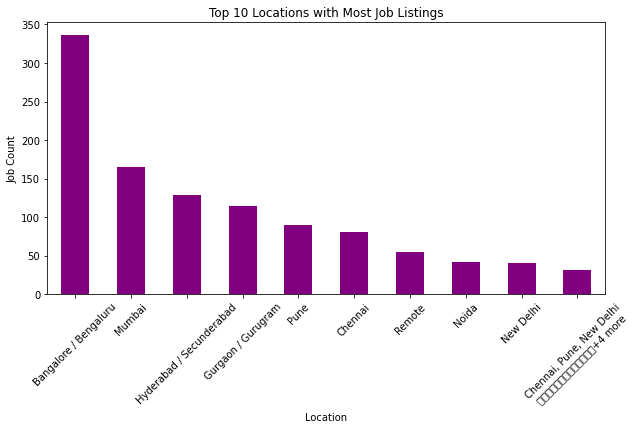

In [34]:
location_jobs = df['location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
location_jobs.plot(kind='bar', color='purple')
plt.title("Top 10 Locations with Most Job Listings")
plt.xlabel("Location")
plt.ylabel("Job Count")
plt.xticks(rotation=45)
plt.show()

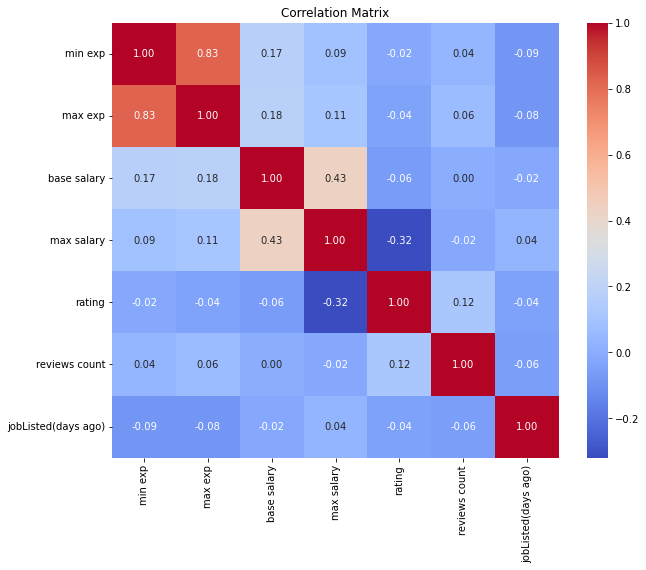

In [36]:
# Select numeric columns
numeric_columns = ['min exp', 'max exp', 'base salary', 'max salary', 'rating', 'reviews count', 'jobListed(days ago)']

# Calculate correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


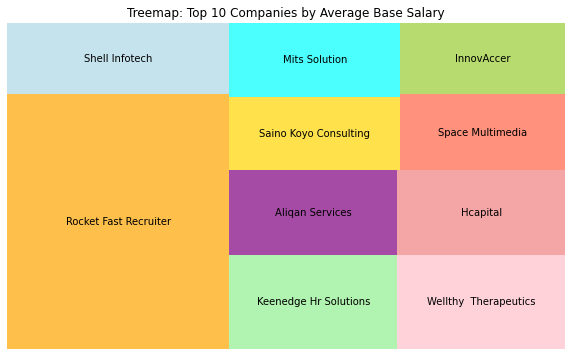

In [44]:
import squarify

# Prepare data for the treemap
labels = avg_salary_by_company.index
values = avg_salary_by_company.values

# Plotting the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=values, label=labels, color=['orange', 'lightblue', 'lightgreen', 'pink', 'purple', 'lightcoral', 'gold', 'aqua', 'tomato', 'yellowgreen'], alpha=0.7)
plt.title('Treemap: Top 10 Companies by Average Base Salary')
plt.axis('off')  # Hide axes
plt.show()

In [43]:

!pip install squarify

Defaulting to user installation because normal site-packages is not writeable
